

*   Abhay Sisodia (200014)
*   Yash Barjatya (201138)
*   Aryan Gupta   (200200)
*   Aditya Kushwaha (200051)








In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Image dataset
df1 = pd.read_csv('/content/drive/MyDrive/Dataset/Image Data/train_image_df.csv')

# Metadata dataset
df2 = pd.read_excel('/content/drive/MyDrive/Dataset/Metadata/train_meta_df.xlsx')

# Title datset
df3 = pd.read_csv('/content/drive/MyDrive/Dataset/Title Data/train_title_df.csv')

# Desc Dataset
df4=pd.read_csv('/content/drive/MyDrive/Dataset/Description Data/train_desc_df.csv')

df_test1=pd.read_csv('/content/drive/MyDrive/Dataset/Image Data/public_image_df.csv')
df_test2=pd.read_excel('/content/drive/MyDrive/Dataset/Metadata/public_meta_df.xlsx')
df_test3=pd.read_csv('/content/drive/MyDrive/Dataset/Title Data/public_title_df.csv')
df_test4=pd.read_csv('/content/drive/MyDrive/Dataset/Description Data/public_desc_df.csv')

<Axes: >

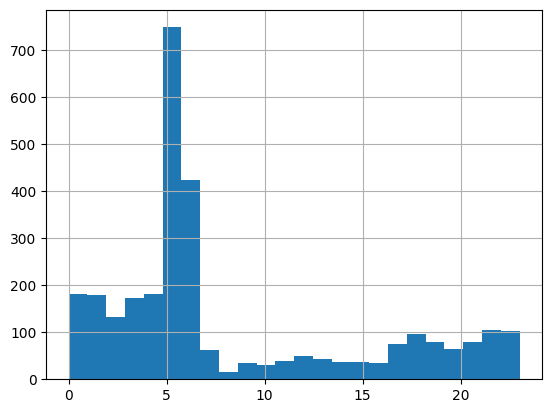

In [58]:
meta_train=df2
display(meta_train['hour'].hist(bins=24))
# which hour of day , not significant as it will vary for different TIME ZONE


<Axes: >

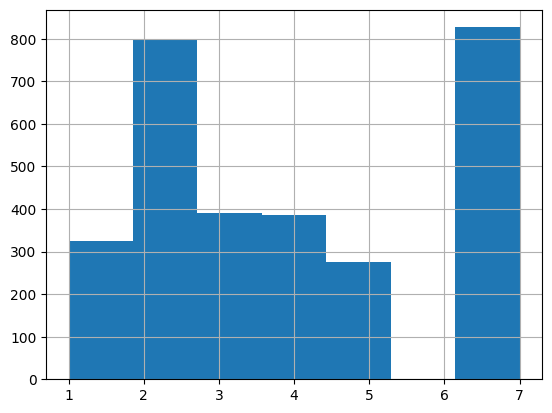

In [59]:
display(meta_train['dayofweek'].hist(bins=7))




<Axes: >

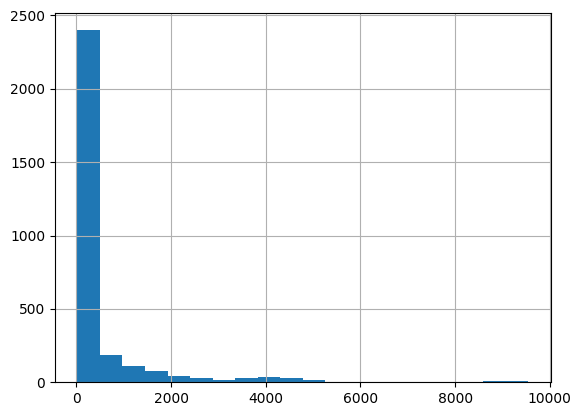

In [60]:
display(meta_train['views'].hist(bins=20))




<Axes: >

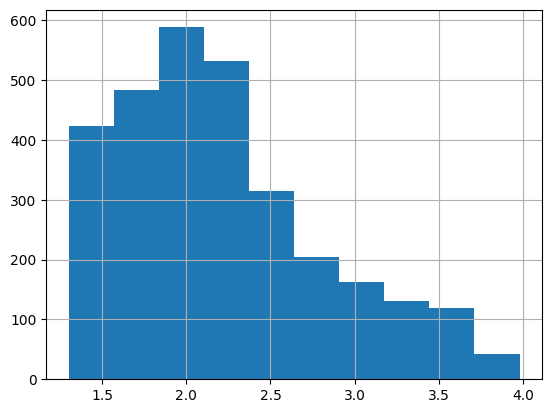

In [61]:
display(np.log10(meta_train['views']).hist())



<Axes: >

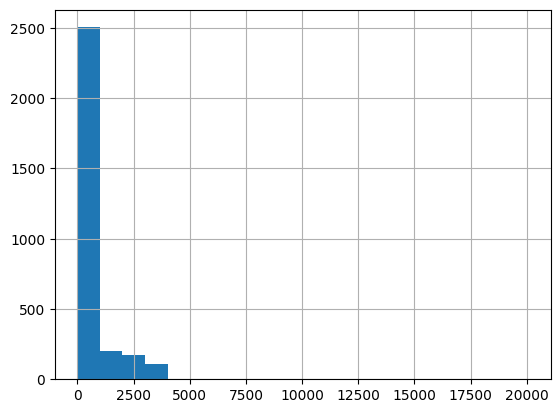

In [62]:
display(meta_train['duration'].hist(bins=20))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

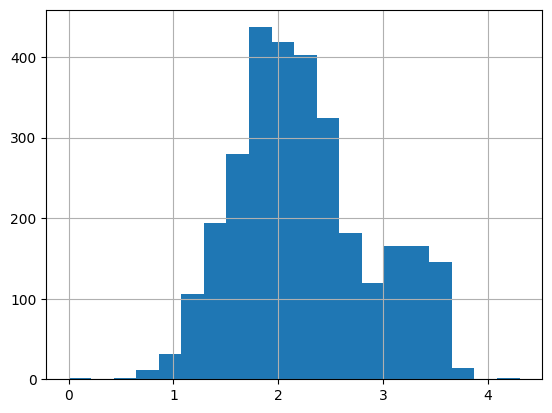

In [63]:

duration_log = np.log10(meta_train['duration']).replace(-np.inf, 0)
duration_log.hist(bins=20)

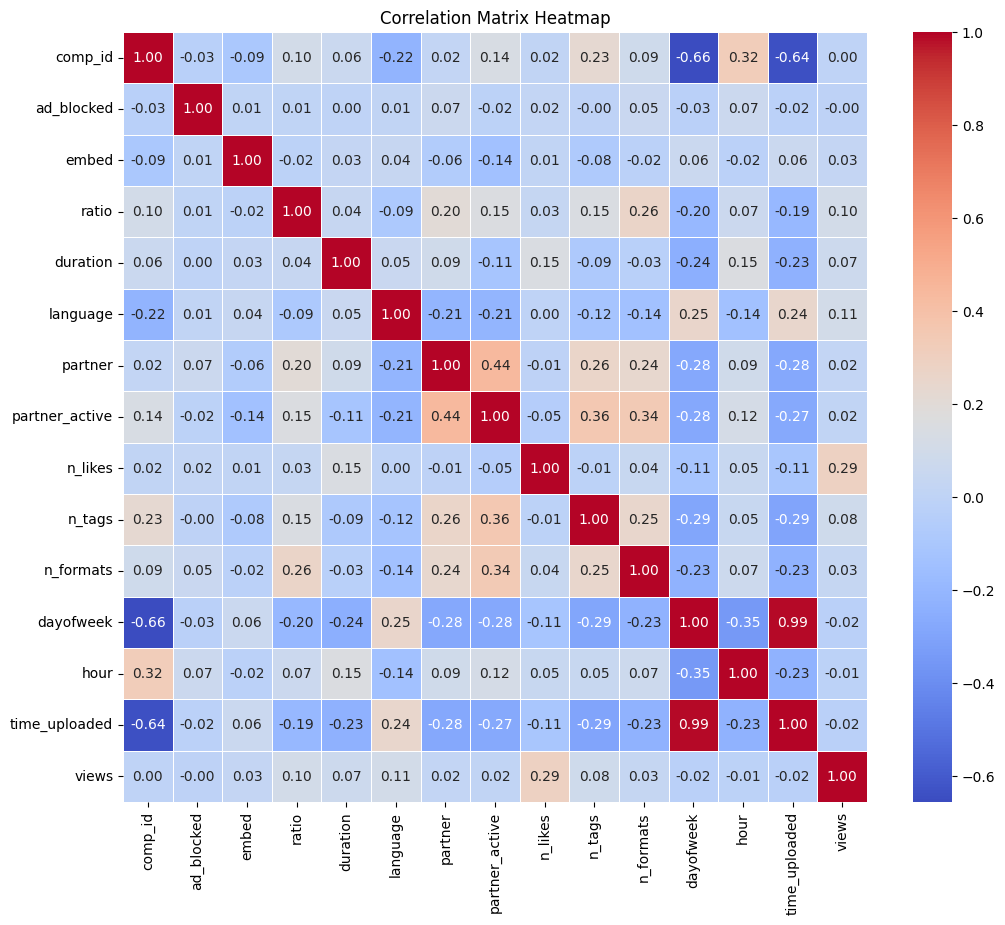

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


target_column = 'views'


X = df2.drop(target_column, axis=1)
y = df2[target_column]

# Calculate the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


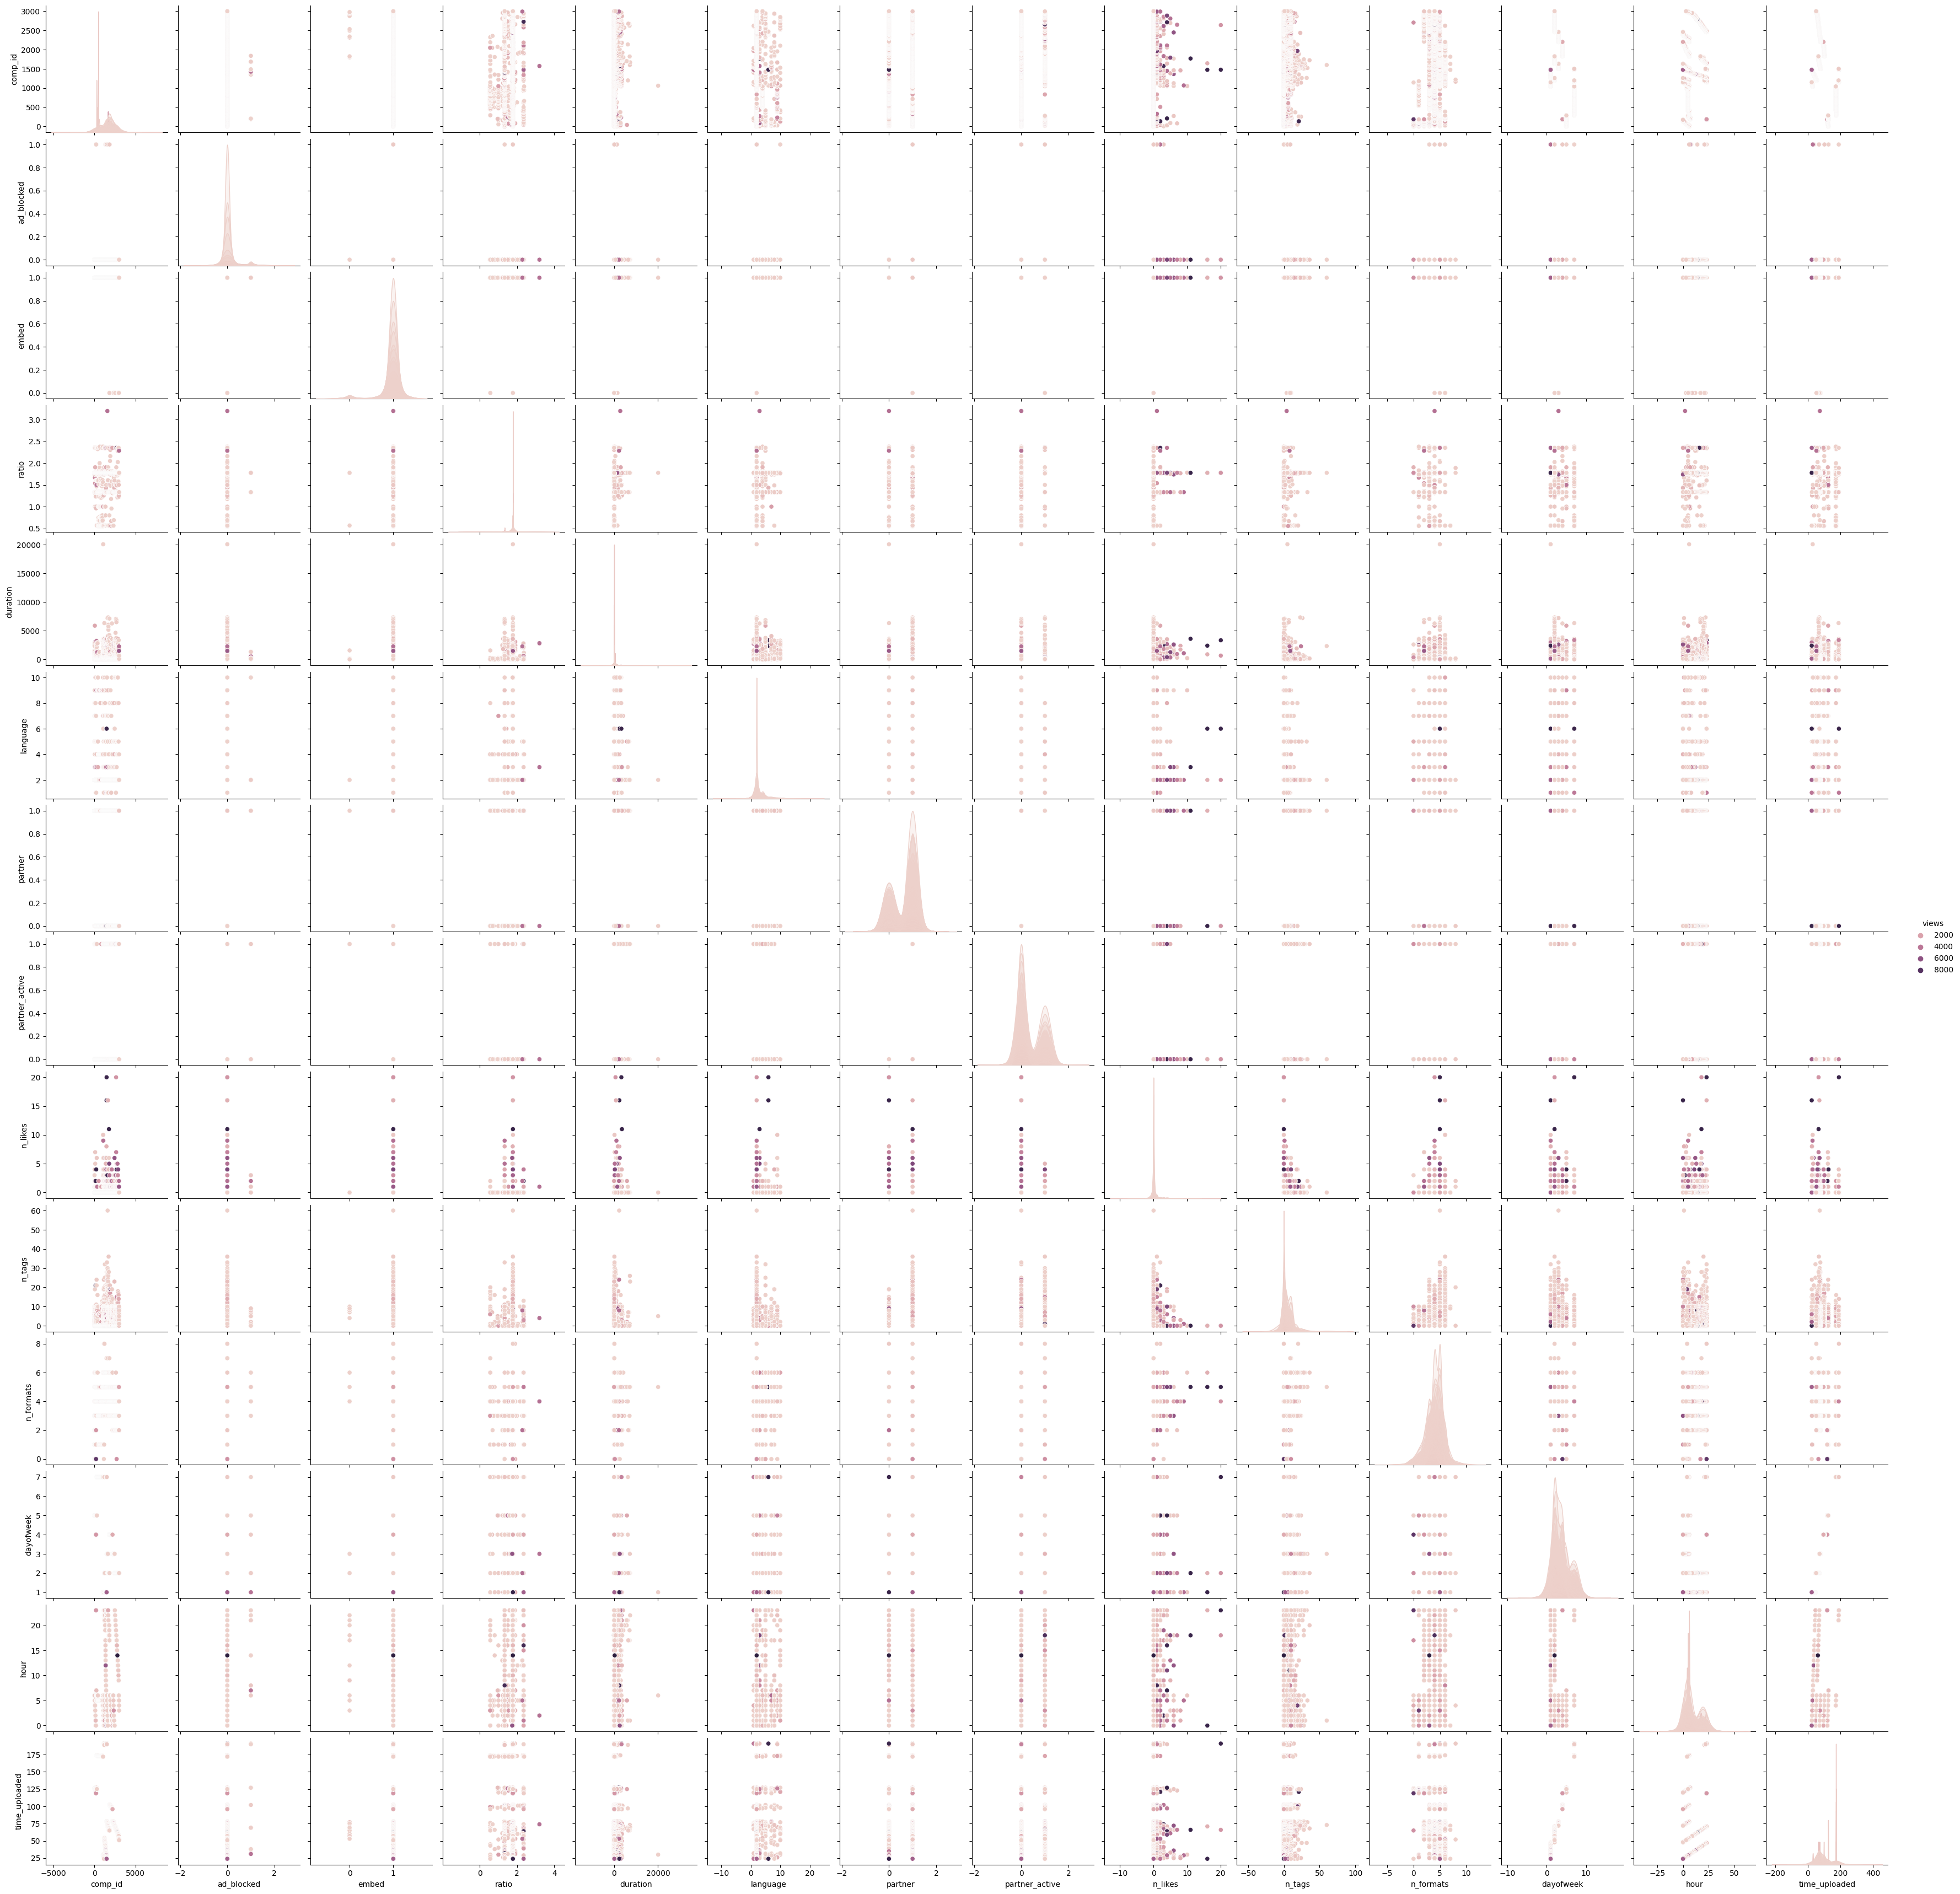

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create a pair plot
sns.pairplot(df2, diag_kind='kde', kind='scatter', hue='views')
plt.show()

***PCA for IMAGE DATA***

In [65]:
image_columns = [f'image_{i}' for i in range(1, 4001)]
image_data = df1[image_columns]

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(image_data)
comp_id=df_test1['comp_id']
df_test1_copy=df_test1
df_test1.drop('comp_id',axis=1)
pca_test=scaler.fit_transform(df_test1)

n_components = 800

# Create PCA model
pca = PCA(n_components=n_components)


principal_components = pca.fit_transform(scaled_data)
principal_component2=pca.fit_transform(pca_test)

# Explore Explained Variance
# Explained variance ratios are useful for understanding how much information each principal component retains from the original data. Higher values indicate that the corresponding principal component captures a larger proportion of the dataset's variance. T
explained_variance = pca.explained_variance_ratio_


# Create DataFrame for Principal Components with desired column names
pca_columns = [f'image{i}' for i in range(1, n_components + 1)]
pca_train_df = pd.DataFrame(data=principal_components, columns=pca_columns)
pca_test_df=pd.DataFrame(data=principal_component2 ,columns=pca_columns)

# Adding 'comp_id' column to principal_df
pca_train_df['comp_id'] = df2['comp_id']
pca_test_df['comp_id']=df_test1_copy['comp_id']

print("Principal Components DataFrame:")
print(pca_train_df.head())
print(pca_test_df.head())


Principal Components DataFrame:
      image1     image2    image3     image4    image5     image6    image7  \
0  -1.342725  -0.641485  0.577212  -0.139931 -0.143163   2.594271 -0.490669   
1   0.384972   0.211862  0.306010  -0.041135  0.431963  -0.452886 -0.780748   
2  35.751570  43.282716 -1.596930   5.495894 -2.708121  -1.312905 -2.001162   
3  -1.198822  -9.366271  9.924456  19.732365  2.943068 -12.321230  0.254719   
4   3.232878  -1.876894  8.482368  -8.944902 -1.906519 -10.030654  2.626610   

      image8     image9    image10  ...  image792  image793  image794  \
0  -0.979812   2.179938   0.771432  ... -0.189136  2.444218 -0.398842   
1  -0.331361  -0.202823  -1.020602  ...  1.041337  0.256060 -2.587216   
2   7.080254  -7.435616   2.898771  ... -0.099585 -0.678808  1.008261   
3  10.866065 -13.225801   0.493157  ...  0.390120  0.951211  1.485078   
4   7.536699  -6.221275 -16.440595  ...  0.184600  0.068156 -0.760822   

   image795  image796  image797  image798  image799  i

***SELECT K_BEST USING F_REGRESSION ON TITLE DATA***






In [66]:

from sklearn.feature_selection import SelectKBest, f_regression


y = df2['views']
X = df3.drop('comp_id', axis=1)

# Use SelectKBest with f_regression (adjust k as needed)
k_best = SelectKBest(f_regression, k=15)
X_title = k_best.fit_transform(X, y)


selected_columns = X.columns[k_best.get_support(indices=True)]
X_title_df = pd.DataFrame(X_title, columns=selected_columns)
X_title_df['comp_id']=df2['comp_id']

comp_id_column = 'comp_id'


df_test3_selected = df_test3[X_title_df.columns]
display(X_title_df.head())
display(df_test3_selected.head())


,title_1,title_8,title_9,title_12,title_16,title_17,title_21,title_24,title_27,title_29,title_36,title_37,title_40,title_45,title_49,comp_id
0,-0.977637,-0.662264,0.130342,0.323026,0.735123,0.198388,-0.936445,0.313998,-0.164988,0.186666,0.303087,0.697851,0.574730,-0.033425,1.270722,1
1,0.041873,1.019706,0.340133,0.897807,0.155261,-0.915965,-0.313533,1.067428,1.069839,-0.254688,0.380507,0.707798,0.784910,-0.178225,-0.530106,2
2,-0.905595,-0.342442,0.031226,0.092803,0.429722,-0.627137,0.651887,-0.199944,0.424186,0.130349,0.715520,0.490704,-0.183714,0.404937,0.357957,3
3,0.069220,-0.267096,0.114066,0.548952,0.398281,-0.644566,-0.541676,0.606353,0.928947,-0.025482,1.100969,-0.713316,0.430793,-0.564691,0.325042,4
4,0.503560,0.250485,0.224235,-0.410092,1.750182,-0.861172,-1.519472,0.039421,-1.101644,-0.204253,0.035955,0.139474,-0.538562,-0.011538,-0.266003,5


,title_1,title_8,title_9,title_12,title_16,title_17,title_21,title_24,title_27,title_29,title_36,title_37,title_40,title_45,title_49,comp_id
0,0.363698,0.407408,-0.048370,-0.072003,-0.035369,-1.277669,0.320456,0.512806,-0.210286,-0.119066,-0.637885,0.330468,0.829397,0.142901,-0.096672,3001
1,0.218130,0.685502,-0.383055,0.164559,0.716197,-0.653424,0.300255,1.082409,-0.609415,-0.082863,-0.683511,0.503950,1.071904,0.151137,-0.009242,3002
2,0.209271,0.324774,-0.032752,-0.300433,-0.094264,-1.316570,0.532683,0.489999,-0.426966,-0.181495,-1.111801,0.539415,0.879335,0.033141,-0.233097,3003
3,1.160773,-0.216526,-0.371494,-0.450701,0.359453,2.121928,-1.872625,-0.557472,-1.642341,0.006548,1.689475,0.411648,1.334928,0.809633,0.217528,3004
4,1.338603,0.885659,0.245418,1.013211,1.800363,0.392083,-0.546709,0.776675,-0.626989,0.023039,-0.745135,2.655715,-0.655801,0.802942,0.746802,3005


***SELECT K_BEST USING F_REGRESSION ON DESCREPTION DATA***


In [68]:

from sklearn.feature_selection import SelectKBest, f_regression




X = df4.drop('comp_id', axis=1)


k_best = SelectKBest(f_regression, k=25)
X_desc = k_best.fit_transform(X, y)

# Convert X_selected into a DataFrame
selected_columns = X.columns[k_best.get_support(indices=True)]
X_desc_df = pd.DataFrame(X_desc, columns=selected_columns)
X_desc_df['comp_id']=df2['comp_id']



comp_id_column = 'comp_id'

# Extract features from df_test3, keeping only the columns present in X_title_df
df_test4_selected = df_test4[X_desc_df.columns]

display(X_desc_df.head())
display(df_test4_selected.head())


,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,desc_10,desc_12,...,desc_34,desc_37,desc_38,desc_42,desc_43,desc_46,desc_47,desc_48,desc_49,comp_id
0,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,0.052237,-0.085249,...,0.006824,-0.105503,0.006901,-0.029423,0.052256,-0.021134,0.003324,-0.004393,0.004294,1
1,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,0.052237,-0.085249,...,0.006824,-0.105503,0.006901,-0.029423,0.052256,-0.021134,0.003324,-0.004393,0.004294,2
2,0.213562,0.252663,0.090735,0.328961,-0.482705,0.067300,0.384217,-0.147253,-0.463378,2.032145,...,0.730609,-0.977806,0.663729,-0.102908,0.576792,0.422263,0.403496,0.264240,7.057590,3
3,0.165262,0.257102,0.421037,0.463214,-0.769155,0.159450,0.236385,-0.183974,-0.357842,2.339253,...,0.319092,-0.817347,0.602119,0.052975,0.108777,0.591615,0.415667,0.334706,7.025648,4
4,0.157017,0.282709,-2.674227,-0.711383,2.259387,-0.162175,0.605468,0.712229,0.027828,1.597859,...,-3.005544,-0.326522,0.134930,0.297421,-0.097744,0.244313,0.099975,0.371806,-2.259024,5


,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,desc_10,desc_12,...,desc_34,desc_37,desc_38,desc_42,desc_43,desc_46,desc_47,desc_48,desc_49,comp_id
0,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,-0.523113,2.115100,...,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430,3001
1,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,-0.523113,2.115100,...,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430,3002
2,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,-0.523113,2.115100,...,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430,3003
3,-0.022012,0.552924,0.046070,0.044543,0.132187,-0.549770,1.437774,1.286943,1.445921,0.896638,...,0.911892,-1.144807,1.075566,-1.001942,-1.502183,0.181976,0.437707,0.058352,-2.209322,3004
4,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,-0.523113,2.115100,...,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430,3005


In [69]:
merged_df = pd.merge(df2, pca_train_df, on='comp_id', how='inner')
merged_df = pd.merge(merged_df, X_title_df, on='comp_id', how='inner')
merged_df = pd.merge(merged_df, X_desc_df, on='comp_id', how='inner')
# merged_df.describe()
# merged_df.dtypes
# merged_df
merged_test_df=pd.merge(df_test2,pca_test_df,on='comp_id',how='inner')
merged_test_df=pd.merge(merged_test_df,df_test3_selected,on='comp_id',how='inner')
merged_test_df=pd.merge(merged_test_df,df_test4_selected,on='comp_id',how='inner')


In [70]:
merged_df.dropna(inplace=True)
display(merged_df.head())
display(merged_test_df.head())

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,desc_33,desc_34,desc_37,desc_38,desc_42,desc_43,desc_46,desc_47,desc_48,desc_49
0,1,False,True,1.77778,86,3,True,False,0,290,...,-0.005617,0.006824,-0.105503,0.006901,-0.029423,0.052256,-0.021134,0.003324,-0.004393,0.004294
1,2,False,True,1.33333,1129,2,True,False,0,1443,...,-0.005617,0.006824,-0.105503,0.006901,-0.029423,0.052256,-0.021134,0.003324,-0.004393,0.004294
2,3,False,True,1.76667,1163,2,True,False,0,329,...,-0.071332,0.730609,-0.977806,0.663729,-0.102908,0.576792,0.422263,0.403496,0.264240,7.057590
3,4,False,True,1.77778,1326,2,True,False,0,63,...,0.059239,0.319092,-0.817347,0.602119,0.052975,0.108777,0.591615,0.415667,0.334706,7.025648
4,5,False,True,1.77273,2612,2,True,False,3,37,...,0.386677,-3.005544,-0.326522,0.134930,0.297421,-0.097744,0.244313,0.099975,0.371806,-2.259024


,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,...,desc_33,desc_34,desc_37,desc_38,desc_42,desc_43,desc_46,desc_47,desc_48,desc_49
0,3001,False,True,1.33333,1675,2,False,False,0,10,...,-0.148813,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430
1,3002,False,True,1.33333,1479,2,False,False,0,10,...,-0.148813,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430
2,3003,False,True,1.33333,1505,2,False,False,0,10,...,-0.148813,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430
3,3004,False,True,1.77778,50,2,True,True,1,6,...,0.044982,0.911892,-1.144807,1.075566,-1.001942,-1.502183,0.181976,0.437707,0.058352,-2.209322
4,3005,False,True,1.33333,1543,2,False,False,0,6,...,-0.148813,0.576806,-0.163420,0.264794,0.252028,-0.193523,0.276308,-0.045740,-0.007150,-3.448430


In [71]:
from sklearn.preprocessing import LabelEncoder


boolean_columns = ['ad_blocked', 'embed', 'partner','partner_active']

label_encoder = LabelEncoder()

# Apply label encoding to boolean columns
for column in boolean_columns:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])
    merged_test_df[column]=label_encoder.fit_transform(merged_test_df[column])

print(merged_df)
print(merged_test_df)


      comp_id  ad_blocked  embed    ratio  duration  language  partner  \
0           1           0      1  1.77778        86         3        1   
1           2           0      1  1.33333      1129         2        1   
2           3           0      1  1.76667      1163         2        1   
3           4           0      1  1.77778      1326         2        1   
4           5           0      1  1.77273      2612         2        1   
...       ...         ...    ...      ...       ...       ...      ...   
2995     2996           0      1  1.76667       138         2        0   
2996     2997           0      1  1.77778       113         2        0   
2997     2998           0      1  1.77778        30         2        0   
2998     2999           0      1  1.77778       115         2        0   
2999     3000           0      1  1.33333       644         4        0   

      partner_active  n_likes  views  ...   desc_33   desc_34   desc_37  \
0                  0        0    290

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target_column = 'views'


X = merged_df.drop(target_column, axis=1)
y = merged_df[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test_scaled)


rmse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg, squared=False)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("Linear Regression Metrics:")
print(f"RMSE: {rmse_linear_reg}")
print(f"MAE: {mae_linear_reg}")



Linear Regression Metrics:
RMSE: 1290.4156146684675
MAE: 942.1666048126614


In [74]:
# Random Forest Regressor with parallel training
rf_model = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")



Random Forest Metrics:
RMSE: 1056.022301046435
MAE: 566.4193333333334


In [75]:
# Artificial Neural Network (ANN)
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN Metrics:")
print(f"RMSE: {rmse_ann}")

print(f"MAE: {mae_ann}")



ANN Metrics:
RMSE: 1306.8570986058523
MAE: 891.1973732115771


In [88]:

import xgboost as xgb


# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

xg_reg.fit(X_train_scaled, y_train)

y_pred_xg = xg_reg.predict(X_test_scaled)

rmse_xg = mean_squared_error(y_test, y_pred_xg, squared=False)
mse_xg = mean_squared_error(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)


print("XGBoost Metrics:")
print(f"RMSE: {rmse_xg}")

print(f"MAE: {mae_xg}")



XGBoost Metrics:
RMSE: 958.6493318703676
MAE: 536.5916882658005


Model Implementation on the Actual Test Data available

In [77]:
target_column = 'views'
output=pd.read_csv('/content/drive/MyDrive/Dataset/solution_format.csv')


X = merged_df.drop(target_column, axis=1)
y = merged_df[target_column]
X_test=merged_test_df
Y_test=output['views']

# Standardize the data using StandardScaler-- making the data ready for modeling by ensuring that each feature has a similar scale and distribution.

# standardizes features by removing the mean and scaling to unit variance. It is often used to ensure that the features have a mean of 0 and a standard deviation of 1.

scaler = StandardScaler()

# The fit_transform method is called on the training data X. This method computes the mean and standard deviation necessary for standardization and then applies the transformation to the data. In other words, it scales and centers the training data.
X_train_scaled = scaler.fit_transform(X)

# The same transformation is then applied to the test data X_test. It's crucial to use the mean and standard deviation computed from the training data (fit_transform on X) to standardize the test data. This ensures consistency between the training and test datasets.
X_test_scaled = scaler.transform(X_test)

In [78]:
# Linear Regression
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_scaled, y)
y_pred_linear_reg = linear_reg_model.predict(X_test_scaled)

# computed different metric
rmse_linear_reg = mean_squared_error(Y_test, y_pred_linear_reg, squared=False)
mse_linear_reg = mean_squared_error(Y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(Y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(Y_test, y_pred_linear_reg)

print("Linear Regression Metrics:")
print(f"RMSE: {rmse_linear_reg}")
print(f"MAE: {mae_linear_reg}")



Linear Regression Metrics:
RMSE: 5354.3390454887385
MAE: 4507.103617836314


RandomForestRegressor: This is an ensemble learning method for regression, known as a Random Forest Regressor. It builds multiple decision trees during training and merges them together to get a more accurate and stable prediction.

n_estimators: The number of trees in the forest. In this case, it is set to 50.

n_jobs: The number of jobs to run in parallel for both fit and predict. Setting it to -1 uses all available processors.

random_state: A seed for reproducibility. Ensures that the randomization during the construction of each tree is the same.

In [79]:
# Random Forest Regressor- parallel computing 
# the computation will be dispatched on all the CPUs of the computer
rf_model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
rf_model.fit(X_train_scaled, y)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
rmse_rf = mean_squared_error(Y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")


Random Forest Metrics:
RMSE: 3714.501117791054
MAE: 3068.150851926978


In [80]:
# XGBoost Regressor

# xg_reg is an instance of the XGBoost Regressor.

# objective='reg:squarederror' specifies that the regression objective should be used (i.e., it's a regression problem).
# colsample_bytree=0.3 is the fraction of features that will be randomly sampled to grow trees, helping prevent overfitting.
# learning_rate=0.1 is the step size shrinkage used to prevent overfitting.
# max_depth=5 sets the maximum depth of a tree, controlling the complexity of the individual trees.
# alpha=10 is the L1 regularization term on weights. It helps in preventing overfitting.
# n_estimators=100 specifies the number of boosting rounds (trees) to be run.
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=100, random_state=42)

xg_reg.fit(X_train_scaled, y)
y_pred_xg = xg_reg.predict(X_test_scaled)


rmse_xg = mean_squared_error(Y_test, y_pred_xg, squared=False)
mse_xg = mean_squared_error(Y_test, y_pred_xg)
mae_xg = mean_absolute_error(Y_test, y_pred_xg)
r2_xg = r2_score(Y_test, y_pred_xg)

print("XGBoost Metrics:")
print(f"RMSE: {rmse_xg}")

print(f"MAE: {mae_xg}")



XGBoost Metrics:
RMSE: 4481.190048463634
MAE: 3688.489487924634


In [81]:
# Artificial Neural Network (ANN)

# hidden_layer_sizes: The number of neurons in each hidden layer. In this case, there are two hidden layers with 100 and 50 neurons, respectively.


# MLPRegressor in scikit-learn is the rectified linear unit (ReLU) activation function for hidden layers and the identity (linear) activation function for the output layer.

ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y)
y_pred_ann = ann_model.predict(X_test_scaled)


rmse_ann = mean_squared_error(Y_test, y_pred_ann, squared=False)
mse_ann = mean_squared_error(Y_test, y_pred_ann)
mae_ann = mean_absolute_error(Y_test, y_pred_ann)
r2_ann = r2_score(Y_test, y_pred_ann)

print("ANN Metrics:")
print(f"RMSE: {rmse_ann}")
print(f"MAE: {mae_ann}")



ANN Metrics:
RMSE: 4373.523139859453
MAE: 3610.7138397108424


**RESULT SUMMARY**

In [84]:
data = {'Models': ['Linear_Regression', 'RandomForestRegressor', 'XGBRegressor', 'MLPRegressor'],
        'RMSE': [5354,3714, 4481, 4373],
        'MAE':[4507,3068,3688,3610]}

# Creates pandas DataFrame.
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
display(df)

,Models,RMSE,MAE
0,Linear_Regression,5354,4507
1,RandomForestRegressor,3714,3068
2,XGBRegressor,4481,3688
3,MLPRegressor,4373,3610


from matplotlib import pyplot as plt
df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='RMSE', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='MAE', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)